In [162]:
#-----------------------------------------------------------------------------------------------------------------------#
#                                       Project 2 - Human Resource (HR) Analytics 
#-----------------------------------------------------------------------------------------------------------------------#

In [163]:
#1. Data Understanding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

import warnings


In [164]:
hr_data=pd.read_csv('https://raw.githubusercontent.com/yashj1301/Python-Projects/master/data/hrdata.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [165]:
#Studying the Data

print(hr_data.columns) #column names
(hr_data.shape) #no of entries

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


(14999, 10)

In [166]:
hr_data.info() #information regarding the features of the data
hr_data.describe(percentiles=[0.25,0.5,0.75,1]).round(2) #dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
100%,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [167]:
#2. Data Cleaning and Preparation

hr_data.columns
hr_data=hr_data.rename(columns={'average_montly_hours':'average_monthly_hours'}) #renaming incorrect values
hr_data.columns=hr_data.columns.str.lower() #changing the case to lower-case

#checking for duplicate values
hr_data.loc[hr_data.duplicated()] #checking duplicate values
hr_data.drop_duplicates(keep=False, inplace=True) #deleting duplicate values

hr_data.columns
hr_data.isnull().any() #Hence, no null values 

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [168]:

#combining support, technical and IT into one value - technical
hr_data['department']=np.where(hr_data['department'] =='support', 'technical', hr_data['department']) 
hr_data['department']=np.where(hr_data['department'] =='IT', 'technical', hr_data['department'])

hr_data['department'].unique() #checking the unique values

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'RandD', 'marketing'], dtype=object)

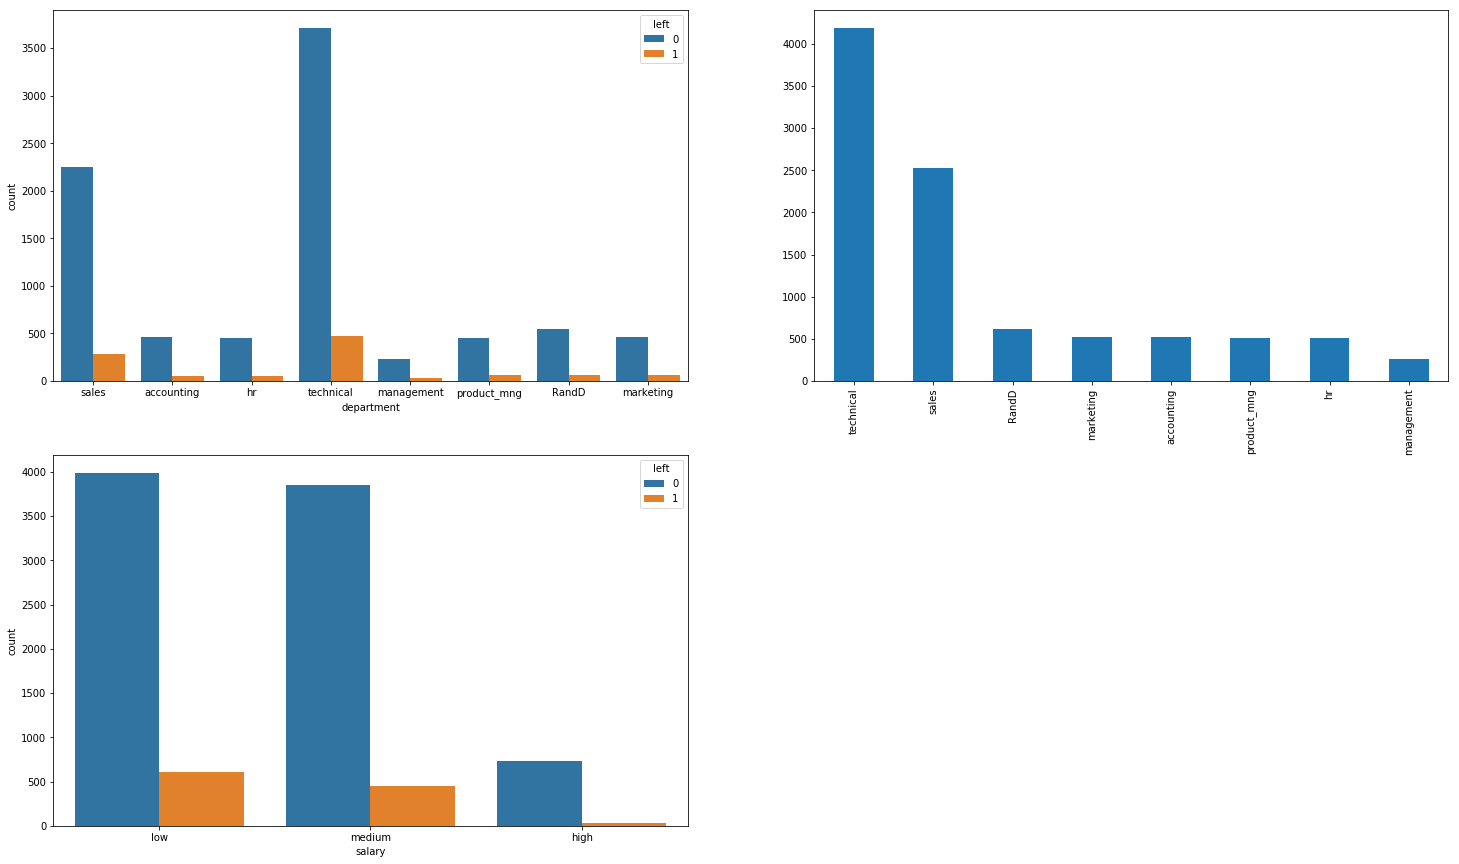

In [169]:
#3. Visualizing the Data

plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
hr_data.groupby(['department'])['left'].value_counts() #checking how many from each department left and didn't leave
sns.countplot(x = 'department', hue = 'left', data = hr_data)
plt.subplot(2,2,2)
hr_data['department'].value_counts().plot('bar') #people in each department
plt.subplot(2,2,3)
sns.countplot(x = 'salary', hue='left', data = hr_data) #salary of people leaving and not leaving


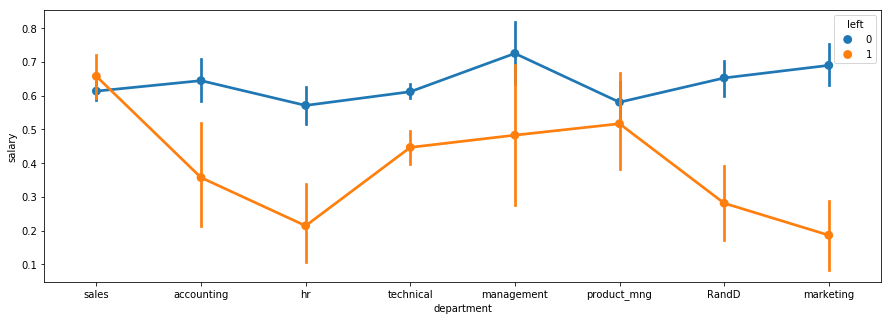

In [170]:
hr=hr_data.copy()
hr['salary'] = hr['salary'].astype('category')
hr['salary'] = hr['salary'].cat.reorder_categories(['low', 'medium', 'high'])
hr['salary'] = hr['salary'].cat.codes

plt.figure(figsize=(15,5))
sns.pointplot(x='department', y='salary', hue='left', data=hr) #trend 

In [171]:
#exploring categorical columns
left_=hr_data.groupby('left').mean()
dep_=hr_data.groupby('department').mean()
sal_=hr_data.groupby('salary').mean()

In [172]:
left_

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.668105,0.715925,3.786981,198.786048,3.104643,0.173822,0.010499
1,0.441295,0.728122,3.929695,209.569843,3.891767,0.063830,0.001850


In [173]:
dep_

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.631623,0.715114,3.849026,202.089286,3.274351,0.170455,0.103896,0.024351
accounting,0.629052,0.723017,3.837524,200.547389,3.249516,0.154739,0.108317,0.011605
hr,0.640335,0.722185,3.687008,200.159449,3.155512,0.141732,0.110236,0.013780
management,0.645000,0.733333,3.817829,202.856589,3.189922,0.158915,0.112403,0.015504
marketing,0.649163,0.719601,3.747148,199.188213,3.207224,0.153992,0.112167,0.020913
product_mng,0.638071,0.714331,3.787402,198.094488,3.157480,0.173228,0.118110,0.000000
sales,0.644621,0.710877,3.772512,199.416272,3.163507,0.163902,0.110585,0.007109
technical,0.644761,0.719269,3.832378,200.101242,3.198663,0.161652,0.113897,0.007402


In [174]:
sal_

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.648758,0.708375,3.815059,199.906209,3.167768,0.158520,0.036988,0.021136
low,0.640490,0.720342,3.805616,200.127558,3.183283,0.164345,0.131911,0.003047
medium,0.644007,0.715602,3.798001,199.866109,3.207345,0.158996,0.103905,0.014412


In [175]:
"""
Categorical Variables

- Salary
- Department
- Number of Projects
- Left (Target Variable)
- Promotion last 5 years
- Work Accident
- Time Spent in Company

"""

'\nCategorical Variables\n\n- Salary\n- Department\n- Number of Projects\n- Left (Target Variable)\n- Promotion last 5 years\n- Work Accident\n- Time Spent in Company\n\n'

Text(0, 0.5, 'Frequency of Turnover')

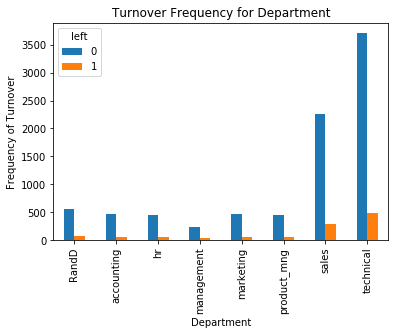

In [176]:
#plot - employee turnover of the company
pd.crosstab(hr_data['department'],hr_data['left']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

Text(0, 0.5, 'Frequency of Turnover')

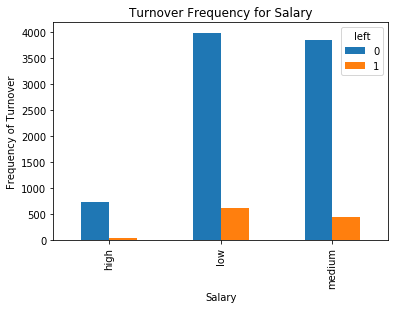

In [177]:
pd.crosstab(hr_data['salary'],hr_data['left']).plot(kind='bar')
plt.title('Turnover Frequency for Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')


Text(0, 0.5, 'Frequency of Turnover')

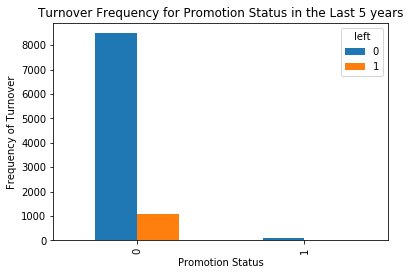

In [178]:
pd.crosstab(hr_data['promotion_last_5years'],hr_data['left']).plot(kind='bar')
plt.title('Turnover Frequency for Promotion Status in the Last 5 years')
plt.xlabel('Promotion Status')
plt.ylabel('Frequency of Turnover')


Text(0, 0.5, 'Frequency of Turnover')

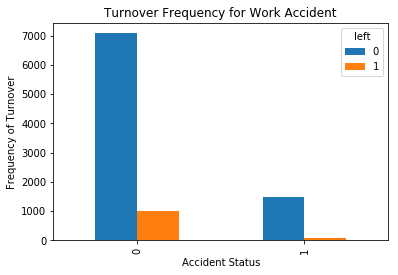

In [179]:
pd.crosstab(hr_data['work_accident'],hr_data['left']).plot(kind='bar')
plt.title('Turnover Frequency for Work Accident')
plt.xlabel('Accident Status')
plt.ylabel('Frequency of Turnover')

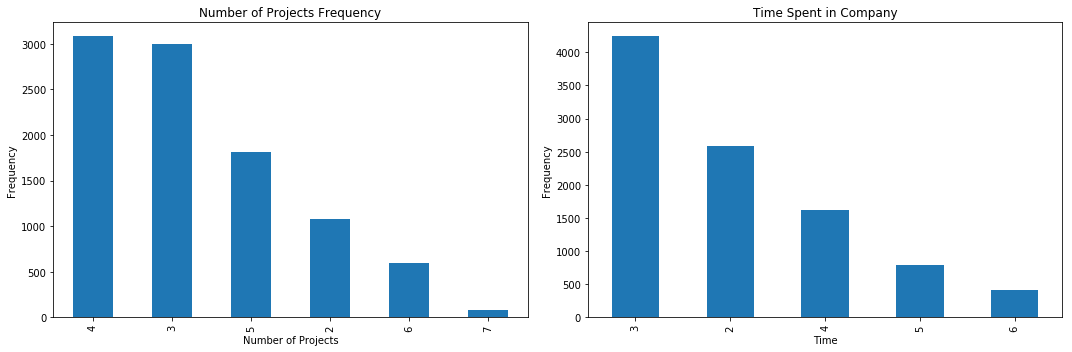

In [180]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Number of Projects Frequency')
plt.xlabel('Number of Projects')
plt.ylabel('Frequency')
hr['number_project'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title('Time Spent in Company')
plt.xlabel('Time')
plt.ylabel('Frequency')
hr['time_spend_company'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

In [181]:

#Correlation with left(target variable) for numeric data
    
corr=hr_data.corr().round(3).loc['left']
corr=pd.DataFrame(corr)
corr

result=[]
    
for i in corr['left']:
        if (i>-1 and i<-0.4): result.append('strong negative')
        elif (i>-0.4 and i<-0.2): result.append('moderate negative')
        elif (i>-0.2 and i<0): result.append('weak negative')
        elif(i>0 and i<0.2): result.append('weak positive')
        elif(i>0.2 and i<0.5): result.append('moderate positive')
        else : result.append('strong positive')
    
corr['correlation']=result


In [182]:
print(corr['correlation'].unique())
corr['correlation'].value_counts()

['moderate negative' 'weak positive' 'moderate positive' 'weak negative'
 'strong positive']


weak positive        3
weak negative        2
moderate positive    1
strong positive      1
moderate negative    1
Name: correlation, dtype: int64

satisfaction_level       moderate negative
last_evaluation              weak positive
number_project               weak positive
average_monthly_hours        weak positive
time_spend_company       moderate positive
work_accident                weak negative
left                       strong positive
promotion_last_5years        weak negative
Name: correlation, dtype: object

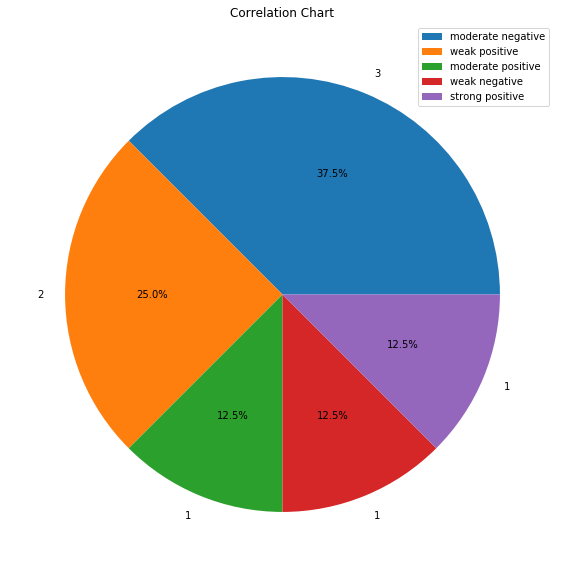

In [183]:
plt.figure(figsize=(10,10))
plt.title('Correlation Chart')
labels=corr['correlation'].unique()
plt15 = corr['correlation'].value_counts().tolist()
plt.pie(plt15, labels=plt15, autopct='%1.1f%%')
plt.legend(labels, loc=1)

corr.loc[:,'correlation']

In [184]:
"""
Variables to be taken for analysis (Based on Visualization) :
    
-Satisfaction Level
-Time Spend Company
-Last Evaluation
-Number of Projects
-Work Accident
-Promotion Last 5 years
-Salary
-Department
"""

'\nVariables to be taken for analysis (Based on Visualization) :\n    \n-Satisfaction Level\n-Time Spend Company\n-Last Evaluation\n-Number of Projects\n-Work Accident\n-Promotion Last 5 years\n-Salary\n-Department\n'

In [185]:
hr=hr_data[['left','satisfaction_level','time_spend_company','last_evaluation','number_project','work_accident','promotion_last_5years','salary','department']]
hr=hr.reset_index(0)
hr=hr.drop(columns=['index'])
hr.head()

,left,satisfaction_level,time_spend_company,last_evaluation,number_project,work_accident,promotion_last_5years,salary,department
0,1,0.36,3,0.46,2,0,0,low,sales
1,1,0.44,3,0.57,2,0,0,low,sales
2,1,0.85,5,0.99,5,0,0,low,sales
3,1,0.78,5,0.93,5,0,0,low,sales
4,1,0.39,3,0.46,2,0,0,low,sales


In [186]:
#Dummy Variables

def dummies(x,df):
    var=pd.get_dummies(df[x], drop_first=True)
    df=pd.concat([df,var], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [187]:
hr=dummies('department',hr)
hr=dummies('salary',hr)
hr=dummies('number_project',hr)
hr=dummies('promotion_last_5years',hr)
hr=dummies('work_accident',hr)
hr=dummies('time_spend_company',hr)

In [188]:
#creating the target and independent variable
hr_var=hr.columns.tolist()
y=['left']
x=[var for var in hr_var if var not in y]

In [189]:
#Starting Regression

from sklearn.feature_selection import RFE #Recursive Feature Selection for Selecting Features
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(hr[x], hr[y])
print(rfe.support_)
print(rfe.ranking_)

list(zip(hr[x].columns,rfe.support_,rfe.ranking_))

num_vars=hr[x].columns[rfe.support_] #selected features
num_vars

x=hr[num_vars]
y=hr['left']

/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear

[False False False False False False False False False False False  True
 False False  True False  True False  True  True False False False False
  True  True  True False  True  True False False]
[ 2  3 23 22 18 20 17 21 19 11 12  1 10  4  1  7  1 13  1  1 16  6 14 15
  1  1  1  9  1  1  5  8]


/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [190]:
#creating regression model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred=logreg.predict(x_test)
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: ',(accuracy_score(y_test,y_pred )*100).round(3),'%') #accuracy score of the model


Logistic regression accuracy:  88.607 %


/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [191]:
#converting to a dataframe
y_pred=pd.DataFrame(y_pred)

y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index(drop=True)

p=pd.concat([y_test, y_pred], axis=1)
p=p.rename(columns={0:'pred_left'})
p.head()

,left,pred_left
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [192]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

rf_pred=pd.DataFrame(rf.predict(x_test))
acc=accuracy_score(y_test,rf_pred)*100
print('Random Forest accuracy: ',acc.round(3),'%') #accuracy score of the model


Random Forest accuracy:  92.025 %


/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


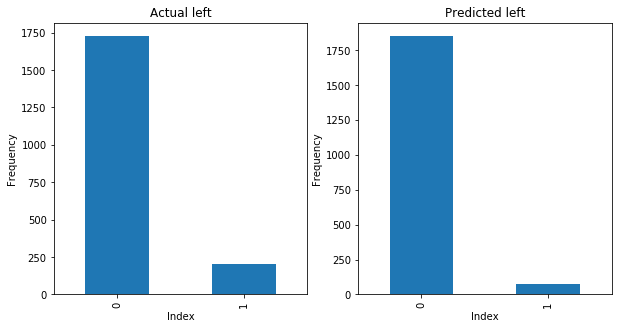

In [193]:
rf_pred[0].value_counts()
rf_pred.index
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Actual left')
plt.xlabel('Index')
plt.ylabel('Frequency')
p['left'].value_counts().plot('bar')
plt.subplot(1,2,2)
plt.title('Predicted left')
plt.xlabel('Index')
plt.ylabel('Frequency')
p['pred_left'].value_counts().plot('bar')
plt.show()

In [194]:
#validation techniques - confusion matrix for logistic regression

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix for Logistic Regression : ',cm)

cm_rf=confusion_matrix(y_test,rf_pred)
print('Confusion Matrix for Random Forest : ',cm_rf)

Confusion Matrix for Logistic Regression :  [[1682   48]
 [ 172   29]]
Confusion Matrix for Random Forest :  [[1625  105]
 [  49  152]]


In [195]:
#validation techniques - K-fold for random forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=10, random_state=100)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_test, y_test, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: ",((results.mean())*100).round(3),'%')


/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

10-fold cross validation average accuracy:  91.768 %


/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/yash_j1301/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [196]:
#classification report to check generalisation of data
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred)) #random forest report
print(classification_report(y_test, y_pred)) #logistic regression report

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1730
           1       0.59      0.76      0.66       201

   micro avg       0.92      0.92      0.92      1931
   macro avg       0.78      0.85      0.81      1931
weighted avg       0.93      0.92      0.92      1931

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1730
           1       0.38      0.14      0.21       201

   micro avg       0.89      0.89      0.89      1931
   macro avg       0.64      0.56      0.57      1931
weighted avg       0.85      0.89      0.86      1931



In [197]:
a=rf.predict_proba(x_test) #predicted probability
a=pd.DataFrame(a)
print(a.loc[:,0].head()) #probability for 0 - did not leave 
print(a.loc[:,1].head()) #probability for 1 - left  



0    0.353810
1    0.993510
2    0.996819
3    0.359317
4    0.978677
Name: 0, dtype: float64
0    0.646190
1    0.006490
2    0.003181
3    0.640683
4    0.021323
Name: 1, dtype: float64


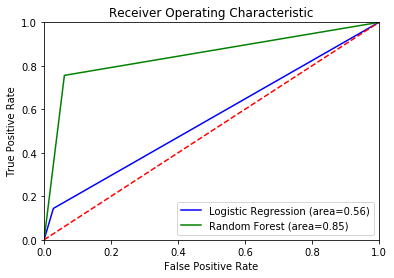

In [198]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_pred)
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,rf_pred)

roc_auc=roc_auc_score(y_test,y_pred)
roc_auc_rf=roc_auc_score(y_test,rf_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='Logistic Regression (area=%0.2f)'%roc_auc)
plt.plot(fpr_rf,tpr_rf,'g',label='Random Forest (area=%0.2f)'%roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [200]:
#-----------------------------------------------------------------------------------------------------------------------#
#                                                        Project End
#-----------------------------------------------------------------------------------------------------------------------#